In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib
import colorsys
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import ticker
import matplotlib.lines as lines

In [3]:
df = pd.read_csv("2022.csv")
df["entry_date"] = pd.to_datetime(df["entry_date"])
df["entry_day_of_week"] = (df["entry_date"].dt.dayofweek + 1) % 7
df["entry_day_of_week_name"] = df["entry_date"].dt.day_name()
df["entry_week_of_year"] = df["entry_date"].dt.isocalendar().week
df["entry_day_of_month"] = df["entry_date"].dt.day
df

,entry_date,zone,group_size,result,entry_day_of_week,entry_day_of_week_name,entry_week_of_year,entry_day_of_month
0,2022-09-02,Core Enchantment Zone,8,Unsuccessful,5,Friday,35,2
1,2022-08-15,Colchuck Zone,2,Unsuccessful,1,Monday,33,15
2,2022-08-12,Snow Zone,8,Unsuccessful,5,Friday,32,12
3,2022-07-12,Core Enchantment Zone,2,Unsuccessful,2,Tuesday,28,12
4,2022-09-03,Stuart Zone,4,Unsuccessful,6,Saturday,35,3
...,...,...,...,...,...,...,...,...
108805,2022-08-22,Core Enchantment Zone,4,Unsuccessful,1,Monday,34,22
108806,2022-08-06,Core Enchantment Zone,8,Unsuccessful,6,Saturday,31,6
108807,2022-08-02,Core Enchantment Zone,4,Unsuccessful,2,Tuesday,31,2
108808,2022-09-02,Core Enchantment Zone,8,Unsuccessful,5,Friday,35,2


In [4]:
df_group = (
    df.groupby(["entry_day_of_week", "entry_week_of_year"])
    .agg({"entry_date": "count"})
    .reset_index()
    .rename(columns={"entry_date": "count"})
)
df_group

,entry_day_of_week,entry_week_of_year,count
0,0,19,74
1,0,20,62
2,0,21,87
3,0,22,90
4,0,23,134
...,...,...,...
165,6,39,507
166,6,40,315
167,6,41,117
168,6,42,38


In [6]:
df_months = df[df["entry_day_of_month"] == 1]
#df_months = df_months[["entry_date", "entry_week_of_year", "entry_day_of_week"]]
df_months = df_months.drop_duplicates(subset=["entry_date", "entry_week_of_year"]).sort_values("entry_week_of_year")
df_months

,entry_date,zone,group_size,result,entry_day_of_week,entry_day_of_week_name,entry_week_of_year,entry_day_of_month
15,2022-06-01,Core Enchantment Zone,8,Unsuccessful,3,Wednesday,22,1
180,2022-07-01,Core Enchantment Zone,5,Unsuccessful,5,Friday,26,1
56,2022-08-01,Core Enchantment Zone,4,Unsuccessful,1,Monday,31,1
6,2022-09-01,Core Enchantment Zone,2,Unsuccessful,4,Thursday,35,1
116,2022-10-01,Core Enchantment Zone,4,Unsuccessful,6,Saturday,39,1


In [16]:
# Calculate lines needed between months
lines = []
for i, row in df_months.iterrows():
    x = [-0.5, row["entry_day_of_week"] - 0.5, row["entry_day_of_week"] - 0.5, 6.5]
    y = [
        row["entry_week_of_year"] + 0.5,
        row["entry_week_of_year"] + 0.5,
        row["entry_week_of_year"] - 0.5,
        row["entry_week_of_year"] - 0.5,
    ]
    lines.append((x, y))
lines

[([-0.5, 2.5, 2.5, 6.5], [22.5, 22.5, 21.5, 21.5]),
 ([-0.5, 4.5, 4.5, 6.5], [26.5, 26.5, 25.5, 25.5]),
 ([-0.5, 0.5, 0.5, 6.5], [31.5, 31.5, 30.5, 30.5]),
 ([-0.5, 3.5, 3.5, 6.5], [35.5, 35.5, 34.5, 34.5]),
 ([-0.5, 5.5, 5.5, 6.5], [39.5, 39.5, 38.5, 38.5])]

In [17]:
df_months = df[df["entry_day_of_month"] == 15]
df_months = df_months[["entry_date", "entry_week_of_year", "entry_day_of_week"]]
df_months = df_months.drop_duplicates().sort_values("entry_week_of_year")
df_months["month"] = df_months["entry_date"].dt.month_name().str[:3]
df_months

,entry_date,entry_week_of_year,entry_day_of_week,month
147,2022-05-15,19,0,May
227,2022-06-15,24,3,Jun
51,2022-07-15,28,5,Jul
1,2022-08-15,33,1,Aug
43,2022-09-15,37,4,Sep
2287,2022-10-15,41,6,Oct


<Figure size 432x288 with 0 Axes>

<Figure size 7200x4800 with 0 Axes>

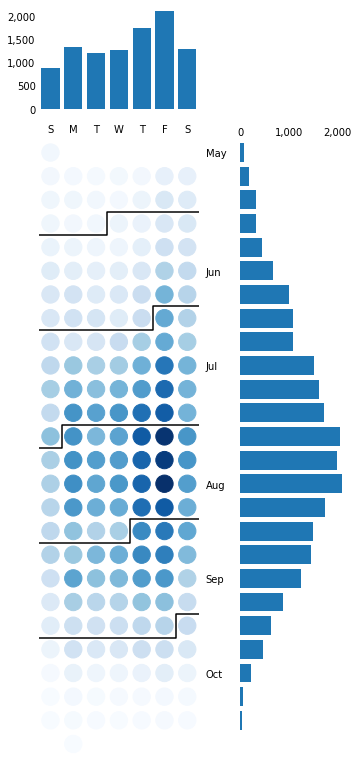

In [20]:
# Set up figure
plt.clf()
plt.figure(dpi=1200, facecolor="white")
fig, axs = plt.subplots(
    2, 2, figsize=(5, 11), height_ratios=[1, 6], width_ratios=[3, 2]
)
fig.patch.set_facecolor("white")
fig.tight_layout()

# Empty
axs[0][1].axis("off")

# Heatmap
axs[1][0].scatter(
    df_group["entry_day_of_week"],
    df_group["entry_week_of_year"],
    marker="o",
    s=300,
    c=df_group["count"],
    cmap="Blues",
)
# Draw borders between months
for (x, y) in lines:
    axs[1][0].plot(x, y, color="black")

axs[1][0].tick_params(
    top=False,
    labeltop=True,
    bottom=False,
    labelbottom=False,
    right=False,
    labelright=True,
    left=False,
    labelleft=False,
)

axs[1][0].spines["top"].set_visible(False)
axs[1][0].spines["right"].set_visible(False)
axs[1][0].spines["bottom"].set_visible(False)
axs[1][0].spines["left"].set_visible(False)

axs[1][0].set_xticks(range(0, 7))
axs[1][0].set_xticklabels(["S", "M", "T", "W", "T", "F", "S"])
axs[1][0].set_xlim([-0.5, 6.5])

axs[1][0].set_yticks(list(df_months["entry_week_of_year"]))
axs[1][0].set_yticklabels(list(df_months["month"]))
axs[1][0].invert_yaxis()
axs[1][0].set_ylim(
    [
        df_group["entry_week_of_year"].max() + 0.5,
        df_group["entry_week_of_year"].min() - 0.5,
    ]
)


# Day of week bar chart
axs[0][0].bar(df_group["entry_day_of_week"], df_group["count"], width=0.8)
axs[0][0].tick_params(top=False, labeltop=False, bottom=False, labelbottom=False)
axs[0][0].spines["top"].set_visible(False)
axs[0][0].spines["right"].set_visible(False)
axs[0][0].spines["bottom"].set_visible(False)
axs[0][0].spines["left"].set_visible(False)
axs[0][0].yaxis.set_tick_params(which="both", length=0)
axs[0][0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axs[0][0].set_xlim([-0.5, 6.5])


# Week of year bar chart
axs[1][1].barh(df_group["entry_week_of_year"], df_group["count"], height=0.8)
axs[1][1].tick_params(right=False, labelright=False, left=False, labelleft=False)
axs[1][1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[1][1].invert_yaxis()
axs[1][1].spines["top"].set_visible(False)
axs[1][1].spines["right"].set_visible(False)
axs[1][1].spines["bottom"].set_visible(False)
axs[1][1].spines["left"].set_visible(False)
axs[1][1].xaxis.set_tick_params(which="both", length=0)
axs[1][1].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axs[1][1].set_ylim(
    [
        df_group["entry_week_of_year"].max() + 0.5,
        df_group["entry_week_of_year"].min() - 0.5,
    ]
)

plt.savefig("images/heatmap_prototype.png", bbox_inches="tight", transparent=False, pad_inches=0.5)